In [39]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
# Create synthetic dataset with 100 samples and 2 groups
X, y_true = make_moons(n_samples=100, noise=0.1, random_state=42)

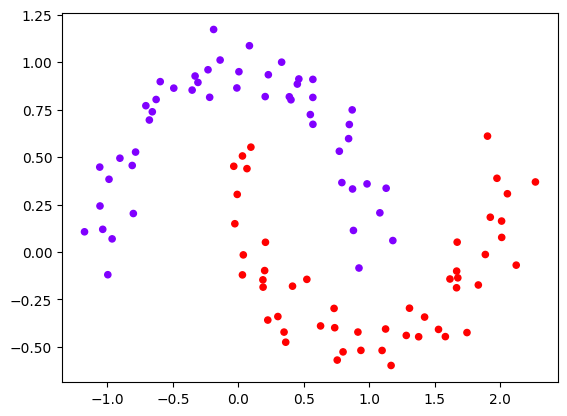

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y_true ,cmap='rainbow');

In [4]:
# Check the data ranges
print("Data ranges:")
print("X - Minimum:", X.min(axis=0))
print("X - Maximum:", X.max(axis=0))


Data ranges:
X - Minimum: [-1.17519678 -0.5978882 ]
X - Maximum: [2.27018382 1.17238503]


In [5]:
# Normalize or standardize the data if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Check the normalized data ranges
print("\nNormalized data ranges:")
print("X_scaled - Minimum:", X_scaled.min(axis=0))
print("X_scaled - Maximum:", X_scaled.max(axis=0))


Normalized data ranges:
X_scaled - Minimum: [-1.8912791  -1.70478506]
X_scaled - Maximum: [1.98742952 1.8713092 ]


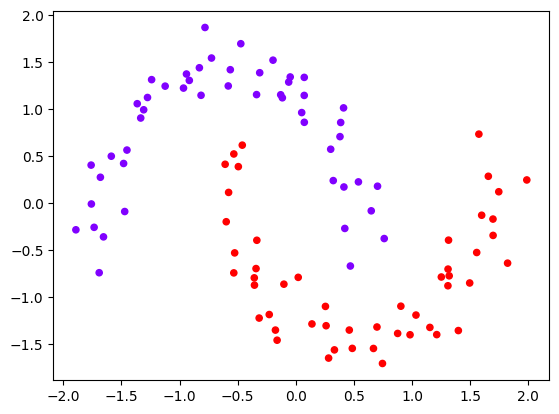

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=20, c=y_true ,cmap='rainbow');

In [8]:
def calculate_centers_from_labels(X, labels):
    """
    Input:
        X: (np.array[N,M]) - The dataset to be clustered
        labels: (np.array[N,1]) - Cluster memberships
    Returns:
        centers: (np.array[k,M]) - Coordinates of the cluster centers
    """
    X = X.copy()
    N,M = X.shape
    num_clusters = np.unique(labels).size
    ctrs = np.zeros((num_clusters,M))
    for i in range(num_clusters):
        data_in_cluster = X[ labels==i ]
        # The centers correspond to the mean value of the data belonging to the cluster i
        ctrs[i,:] = np.mean(data_in_cluster,axis=0)
    return ctrs

In [9]:
real_cluster_centers = calculate_centers_from_labels(X, y_true)
print(f"Based on the labels, there are clusters with centers in: {real_cluster_centers}")

Based on the labels, there are clusters with centers in: [[-0.00253199  0.61514169]
 [ 1.0121105  -0.12307927]]


In [10]:
## Simpler visualization of the resulting clusters

def visualize_and_compare_clusters(X, real_labels, real_centers, estimated_labels, estimated_centers):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_labels: (np.array[N,1]) - Real cluster membership
        real_centers: (np.array[K,2]) - Real cluster centers
        estimated_labels: (np.array[N,1]) - Estimated cluster membership from algorithm
        estimated_labels: (np.array[K,2]) - Estimated cluster centers
    Returns:
        A plot with two axes showing the real clusters and the predicted clusters
    """

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    # First plot contains real cluster membership
    ax = axes[0]
    ax.scatter(x = X[:,0], y = X[:,1], c=real_labels, s=30, label= "Data")
    ax.scatter(x = real_centers[:,0], y = real_centers[:,1], 
            c=np.arange(real_centers.shape[0]), s=200, marker="x", label="Centers")
    ax.set(xlabel="x1",ylabel="x2",title="Real clusters")
    ax.grid(True); ax.legend()

    # Second plot contains estimated cluster membership
    ax = axes[1]
    ax.scatter(x = X[:,0], y = X[:,1], c=estimated_labels, s=30, label="Data")
    ax.scatter(x = estimated_centers[:,0], y = estimated_centers[:,1], 
            c=np.arange(estimated_centers.shape[0]), s=200, marker="x", label="Centers")
    ax.set(xlabel="x1",ylabel="x2",title="Estimated clusters")
    ax.grid(True); ax.legend()

    return plt.show()


In [30]:
# Kmeans with two clusters
kmeans2 = KMeans(n_clusters=2, random_state=30)


# kmeans.fit(X)
kmeans2.fit(X)

y_kmeans2 = kmeans2.predict(X_scaled)
kcenter2 = kmeans2.cluster_centers_


In [32]:
# Kmeans with five clusters
kmean5 = KMeans(n_clusters=5, random_state=30)


# kmeans.fit(X)
kmean5.fit(X)

y_kmeans5 = kmean5.predict(X_scaled)
kcenter5 = kmean5.cluster_centers_

In [41]:
# AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=2, linkage = "ward")
y_agglo = agglomerative.fit_predict(X)

agglocenter = calculate_centers_from_labels(X, y_agglo)

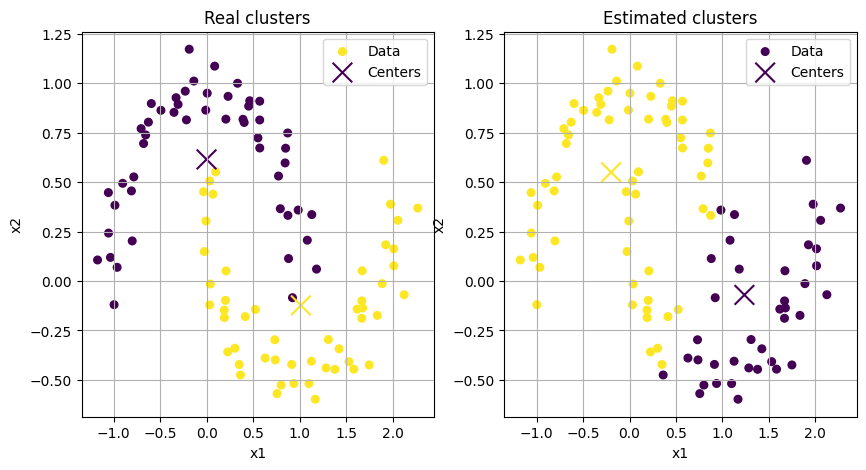

In [31]:
# real vs kmeans with 2 centers
visualize_and_compare_clusters(X, y_true, real_cluster_centers,
                               y_kmeans2, kcenter2)

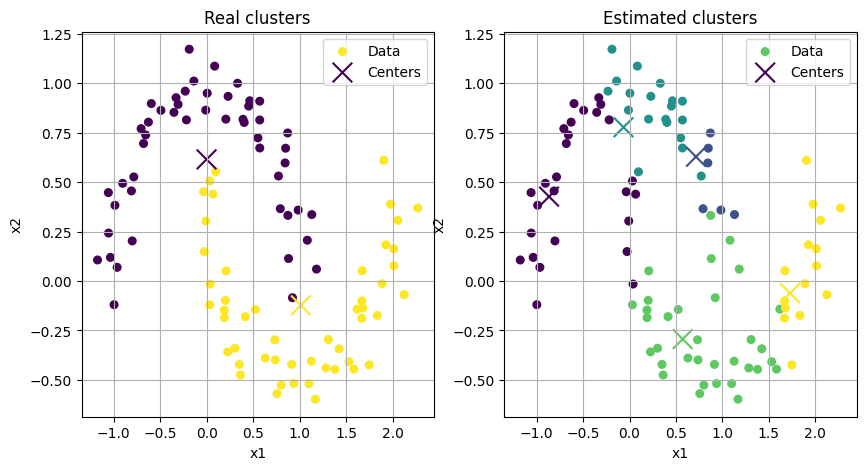

In [34]:
# real vs kmeans with 5 centers
visualize_and_compare_clusters(X, y_true, real_cluster_centers,
                               y_kmeans5, kcenter5)

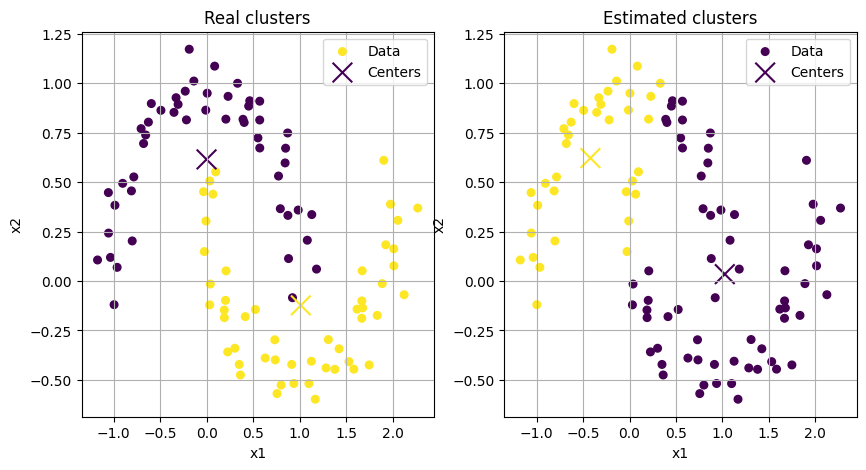

In [42]:
# real vs Agglo with 2 centers
visualize_and_compare_clusters(X, y_true, real_cluster_centers,
                               y_agglo, agglocenter)

In [36]:
silhouette_score_kmeans2 = metrics.silhouette_score(X, y_kmeans2, metric="euclidean")
print("The silhouette score for the KMeans Clustering algorithm with two clusters is:", silhouette_score_kmeans2)

The silhouette score for the KMeans Clustering algorithm is: 0.46859386212228493


In [37]:
silhouette_score_kmeans5 = metrics.silhouette_score(X, y_kmeans5, metric="euclidean")
print("The silhouette score for the KMeans Clustering algorithm with five clusters is:", silhouette_score_kmeans5)

The silhouette score for the KMeans Clustering algorithm with five clusters is: 0.31957775900808827


In [44]:
silhouette_score_agglo = metrics.silhouette_score(X, y_agglo, metric="euclidean")
print("The silhouette score for the Agglo Clustering algorithm with two clusters is:", silhouette_score_agglo)

The silhouette score for the Agglo Clustering algorithm with two clusters is: 0.4411761039820894
